In [67]:
# nc file analysis해서 monthly average graph 그릴 수 있도록 library import
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import xarray as xr

plt.rcParams.update({'font.size': 15}) 

In [68]:
# open ERA5 monthly data by using xarray
ERA5_xr = xr.open_dataset('ERA5 mon.avg.20yr.nc')

In [69]:
ERA5_xr = ERA5_xr.sel(latitude=40.5, longitude=17, method='nearest')
ERA5_xr = ERA5_xr.sel(level=ERA5_xr.level[36], expver=1)

In [70]:
# select time from 2004.01 to 2022.12
ERA5_xr = ERA5_xr.sel(time=slice('2004-01', '2022-12'))
ERA5_xr.variables

Frozen({'longitude': <xarray.Variable ()>
array(17., dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude, 'latitude': <xarray.Variable ()>
array(40.5, dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude, 'level': <xarray.Variable ()>
array(1000)
Attributes:
    units:      millibars
    long_name:  pressure_level, 'expver': <xarray.Variable ()>
array(1)
Attributes:
    long_name:  expver, 'time': <xarray.IndexVariable 'time' (time: 228)>
array(['2004-01-01T00:00:00.000000000', '2004-02-01T00:00:00.000000000',
       '2004-03-01T00:00:00.000000000', ..., '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:  time, 'z': <xarray.Variable (time: 228)>
[228 values with dtype=float32]
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential, 'r': <xarray.Variable (time: 228

In [71]:
# group by the same month 
ERA5_xr = ERA5_xr.groupby('time.month').mean()
ERA5_xr

<xarray.Dataset>
Dimensions:    (month: 12)
Coordinates:
    longitude  float32 17.0
    latitude   float32 40.5
    level      int32 1000
    expver     int32 1
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    z          (month) float32 1.358e+03 1.253e+03 ... 1.33e+03 1.464e+03
    r          (month) float32 75.26 73.54 71.51 69.12 ... 75.79 78.74 76.65
    q          (month) float32 0.005339 0.005414 0.005848 ... 0.00794 0.006101
    t          (month) float32 282.6 283.1 284.8 288.0 ... 291.6 287.9 284.2
    u          (month) float32 0.7052 0.4141 0.266 ... 0.07467 -0.0118 0.5981
    v          (month) float32 -0.9603 -0.6292 -0.2931 ... -0.497 0.3972 -0.8068
    w          (month) float32 0.03824 0.02215 0.003119 ... -0.03764 0.03398
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-22 22:04:26 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

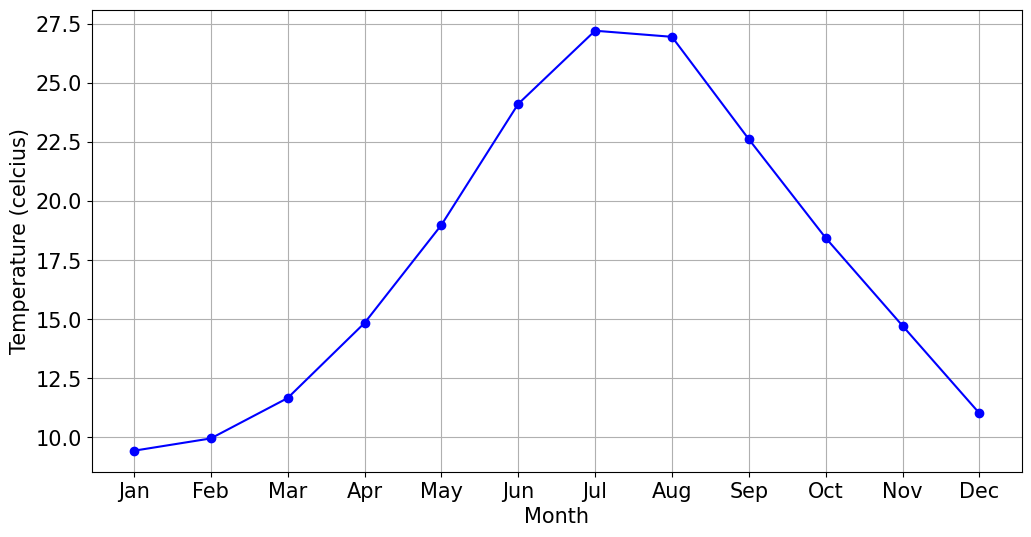

In [72]:
# set figure size
plt.figure(figsize=(12, 6))
plt.grid(True)

# set x-axis
x = ERA5_xr.month
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('Temperature (celcius)')

# set y-axis
y = ERA5_xr.t -273.15

# draw line graph
plt.plot(x, y, color='blue', marker='o')

# save graph as png file
plt.savefig('ERA5_mon_avg_tmp.png', facecolor='white', dpi=300)

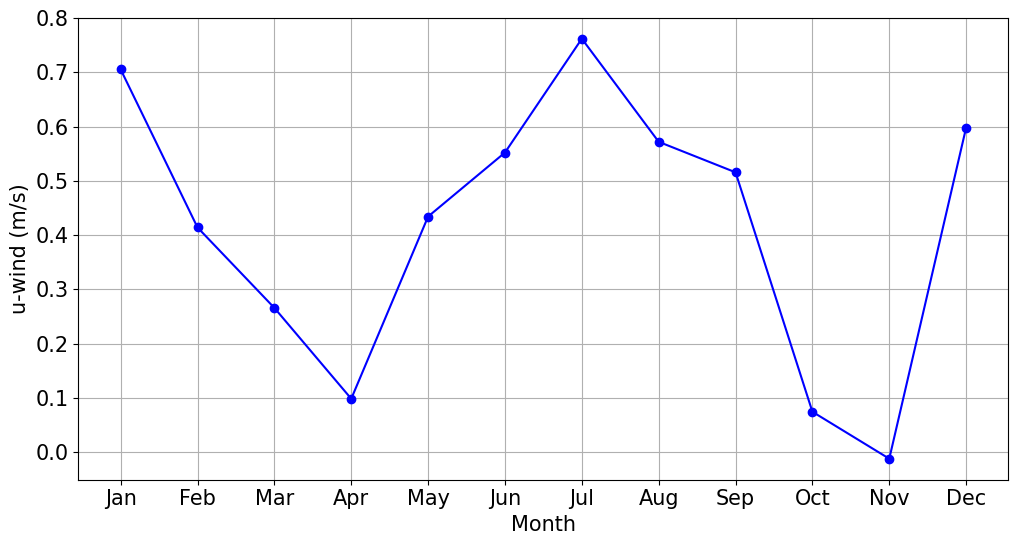

In [73]:
# set figure size
plt.figure(figsize=(12, 6))
plt.grid(True)

# set x-axis
x = ERA5_xr.month
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('u-wind (m/s)')

# set y-axis
y = ERA5_xr.u

# draw line graph
plt.plot(x, y, color='blue', marker='o')

# save graph as png file
plt.savefig('ERA5_mon_avg_u.png', facecolor='white', dpi=300)

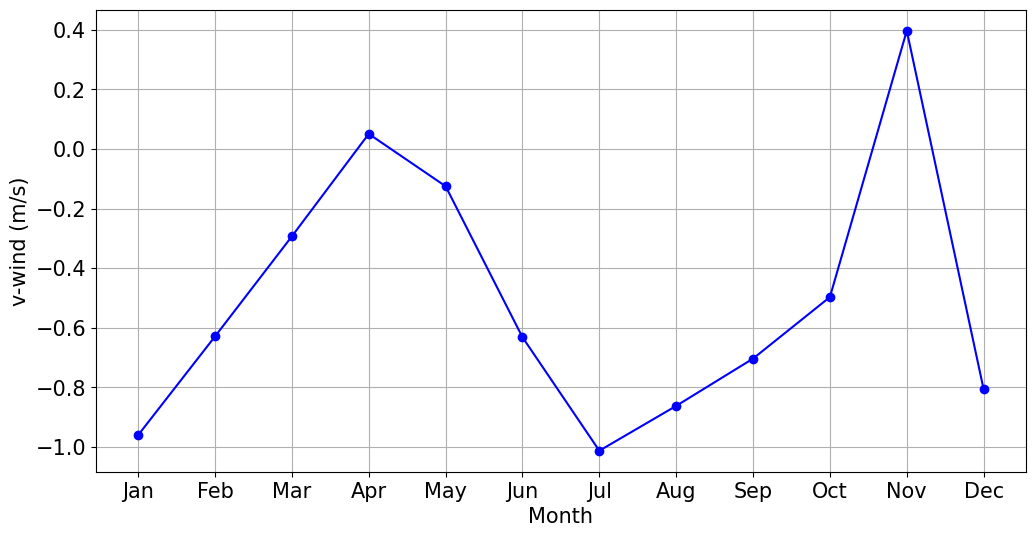

In [74]:
# set figure size
plt.figure(figsize=(12, 6))
plt.grid(True)

# set x-axis
x = ERA5_xr.month
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('v-wind (m/s)')

# set y-axis
y = ERA5_xr.v

# draw line graph
plt.plot(x, y, color='blue', marker='o')

# save graph as png file
plt.savefig('ERA5_mon_avg_v.png', facecolor='white', dpi=300)

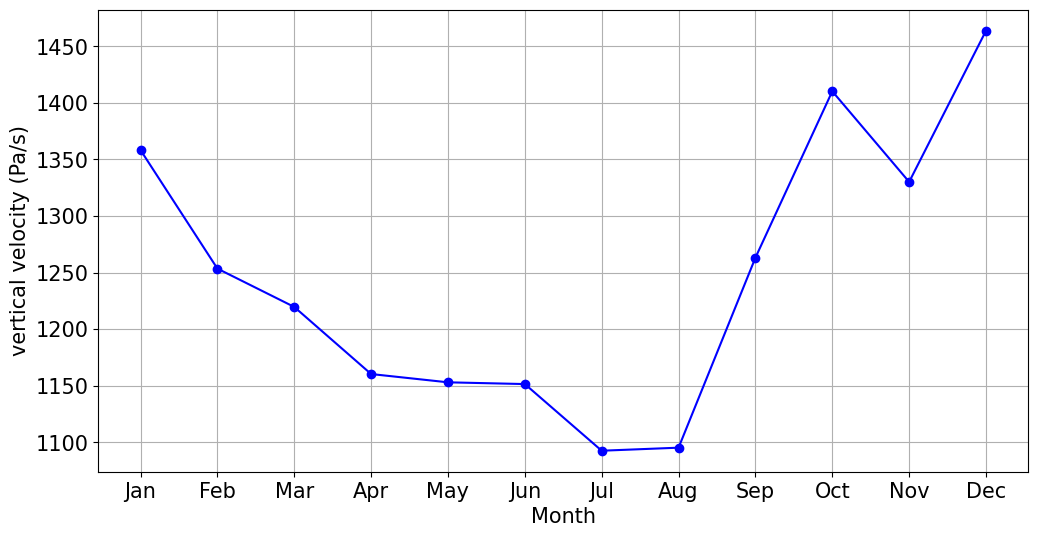

In [75]:
# set figure size
plt.figure(figsize=(12, 6))
plt.grid(True)

# set x-axis
x = ERA5_xr.month
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('vertical velocity (Pa/s)')

# set y-axis
y = ERA5_xr.z

# draw line graph
plt.plot(x, y, color='blue', marker='o')

# save graph as png file
plt.savefig('ERA5_mon_avg_z.png', facecolor='white', dpi=300)

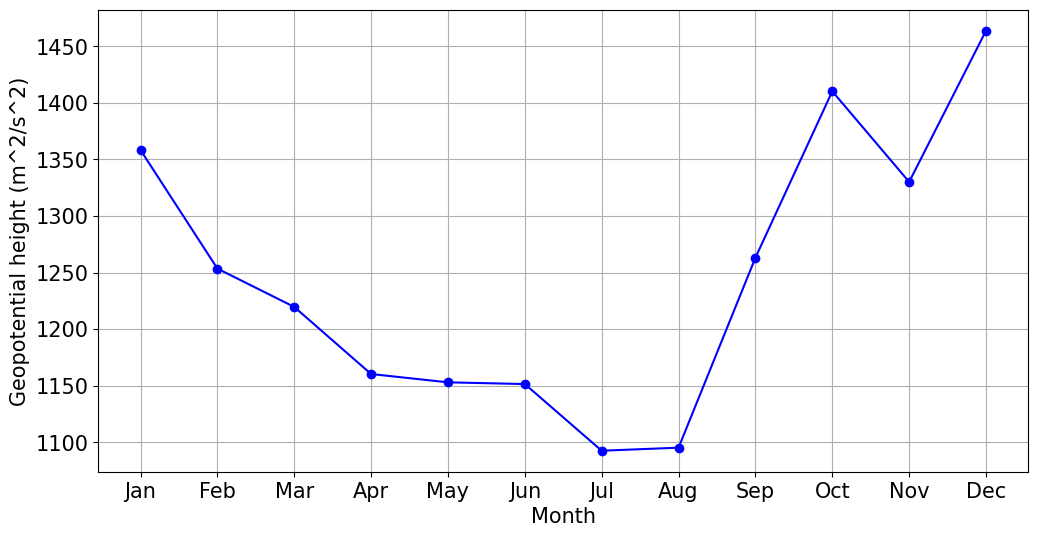

In [76]:
# set figure size
plt.figure(figsize=(12, 6))
plt.grid(True)

# set x-axis
x = ERA5_xr.month
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('Geopotential height (m^2/s^2)')

# set y-axis
y = ERA5_xr.z

# draw line graph
plt.plot(x, y, color='blue', marker='o')

# save graph as png file
plt.savefig('ERA5_mon_avg_gph.png', facecolor='white', dpi=300)

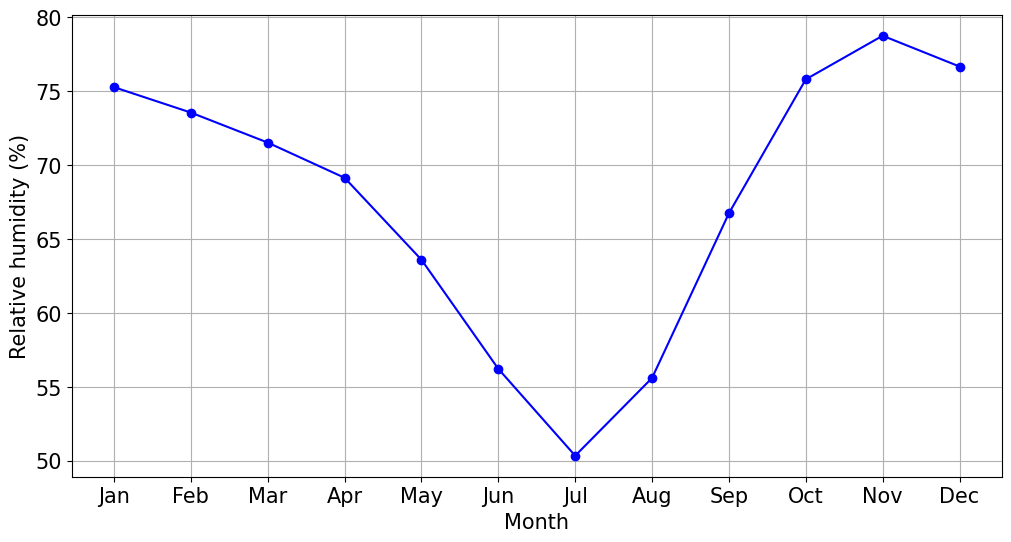

In [77]:
# set figure size
plt.figure(figsize=(12, 6))
plt.grid(True)

# set x-axis
x = ERA5_xr.month
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('Relative humidity (%)')

# set y-axis
y = ERA5_xr.r

# draw line graph
plt.plot(x, y, color='blue', marker='o')

# save graph as png file
plt.savefig('ERA5_mon_avg_rh.png', facecolor='white', dpi=300)

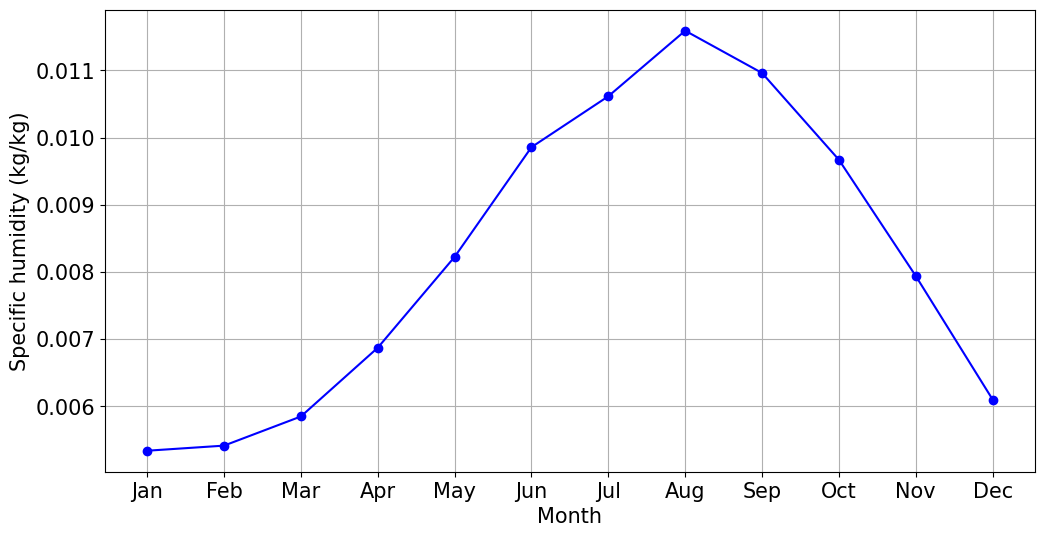

In [78]:
# set figure size
plt.figure(figsize=(12, 6))
plt.grid(True)

# set x-axis
x = ERA5_xr.month
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylabel('Specific humidity (kg/kg)')

# set y-axis
y = ERA5_xr.q

# draw line graph
plt.plot(x, y, color='blue', marker='o')

# save graph as png file
plt.savefig('ERA5_mon_avg_sh.png', facecolor='white', dpi=300)